In [1]:
# import all necessary packages and functions.
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_trip_201402 = pd.read_csv('201309_trip_data.csv', names=('TripID','Duration','Start_Date','Start_Station','Start_Terminal','End_Date','End_Station','End_Terminal','Bike','Subscription_Type','Zip_Code'), header = 0)
df_trip_201402['Start_Date'] = pd.to_datetime(df_trip_201402['Start_Date'])

In [3]:
# Extract the date
df_trip_201402["only_time"] = [str(d.time()) for d in df_trip_201402["Start_Date"]]
df_trip_201402["only_hour"] = 0
only_hour = []
for j in range(len(df_trip_201402.index)):
    a = (df_trip_201402.iloc[j]['only_time'])
    if (a[0] == '0'):
        a = a[1]
    else :
        a = a[:2]
    only_hour.append(int(a))
    
df_trip_201402["only_hour"] = only_hour


In [4]:
hour = []
for i in range(1,24):
    hour.append(i)
print(hour)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [5]:
sub,cust = 0,0
su,cu,total = {},{},{}
su_l,cu_l,total_l = [],[],[]
df_bike = df_trip_201402[["only_hour", "Bike", "Subscription_Type"]]
bike_count_l = []
for j in hour:
    b = df_bike[df_bike["only_hour"] == j]
    sub,cust = 0,0
    for i in range(len(b.index)):
        if (b.iloc[i]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su[j] = sub
    su_l.append(sub)
    cu[j] = cust
    cu_l.append(cust)
    total[j] = (sub + cust)
    total_l.append(sub + cust)

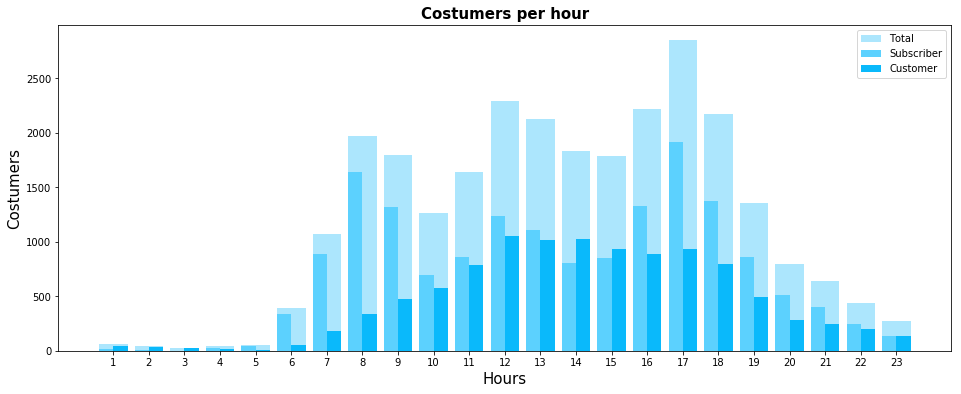

In [6]:
x_plot = np.arange(len(hour))
plt.figure(figsize=(16,6))
bar_width = 0.4
patch1 = plt.bar(x_plot+1, total_l, (bar_width*2), color="#ACE6FD")
patch2 = plt.bar(x_plot+0.8, su_l, bar_width, color="#5CD1FE")
patch3 = plt.bar(x_plot+1.2, cu_l, bar_width, color="#0AB9FB")
plt.title("Costumers per hour", fontsize = 15, fontweight = "bold")
plt.ylabel('Costumers', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.xticks(x_plot+1, hour)
plt.legend((patch1,patch2,patch3),('Total','Subscriber','Customer'))
plt.show()